# Análisis de Palabras que no están en Diccionario

In [33]:
import enchant
import unicodecsv
import datetime
from apps import *
from nltk.tokenize import TweetTokenizer
import csv
tknzr = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
import pandas as pd
import json

d = enchant.Dict("es_AR")
path = 'train/train_' 

## Por provincia :
    - Cantidad de ocurrencia de cada palabra
    - Cantidad de usuarios de cada palabra

In [34]:
def dictionary(provincia,completo):
    dicc = {}
    dicc_usuarios = {}
    cant_words = 0
    file_path = path + provincia + '.csv'
    
    with open(file_path, 'r') as f:
        reader = unicodecsv.reader(f, encoding="utf-8", delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
        for row in reader:
            #row[2] es la columna de texto
            if (completo):
                texto = [w for w in tknzr.tokenize(row[2]) if w.isalpha()]
            else:
                texto = [w for w in tknzr.tokenize(row[2]) if w.isalpha() and (not d.check(w))]
            
            
            uid = row[1]    # la columna de user id
            
            for w in texto:
                dicc[w] = 1 if not dicc.has_key(w) else dicc[w] +1
                if dicc_usuarios.has_key(w):
                    if uid not in dicc_usuarios[w]:
                        dicc_usuarios[w].append(uid)
                else:
                    dicc_usuarios[w] = [uid]
    return dicc,dicc_usuarios

def cant_palabras(dicc):
    return sum(dicc.values())

def save_dicts(pais,completo):
    words = {}
    cant_words = {}
    dicc_usuarios = {}
    for prov in pais:
        cant_words[prov] = 0
    for prov in pais:
        start = datetime.datetime.now()
        words[prov],dicc_usuarios[prov] = dictionary(prov,completo)
        cant_words[prov] = cant_palabras(words[prov])
        end = datetime.datetime.now()
        print prov,cant_words[prov], end - start
    return (words,cant_words,dicc_usuarios)


## Creo el un data frame con toda la data
    - Sumo las ocurrencias de cada palabra en todas las provincias.
    - Agrego las columnas de Frecuencias normalizadas (#palabras por millón) teniendo en cuenta también las palabras que se encontraban en el Diccionario de pyenchant

In [69]:
wcd = save_dicts(argentina,False)
wcd2 = save_dicts(argentina,True)

words2 = wcd2[0]
cant_words2 = wcd2[1]
dicc_usuarios2 = wcd2[2]

words = wcd[0]
cant_words = wcd[1]
dicc_usuarios = wcd[2]



cantPorProvincia = {prov:sum (words2[prov].values()) for prov in argentina}


users_cant = {}
for prov in argentina:
    for pal,lista in dicc_usuarios[prov].iteritems():
        #print prov,pal,lista
        if not users_cant.has_key(prov):
            users_cant[prov] = {}
            users_cant[prov][pal] = len(lista)
        else:
            users_cant[prov][pal] = len(lista)
df = pd.DataFrame(words)
df1 = pd.DataFrame(users_cant)
print df.shape
print df1.shape
df = df.fillna(0)
df1 = df1.fillna(0)
df.columns = [str(col) + 'Palabras' for col in df.columns]
df1.columns = [str(col) + 'Personas' for col in df.columns]
df1['cantUsuariosTotal'] = df1.sum(axis=1)
df['cantPalabra'] = df.sum(axis=1)

result = pd.concat([df, df1], axis=1)

for prov in argentina:
    result['fnorm_'+prov] = result[prov+'Palabras']/ (cantPorProvincia[prov]/1000000.0)



jujuy 129718 0:00:33.891907
catamarca 124611 0:00:31.951680
sanjuan 107572 0:00:28.520111
salta 125364 0:00:33.350201
rionegro 121512 0:00:33.296978
lapampa 126045 0:00:35.240465
chaco 121466 0:00:31.318850
mendoza 120822 0:00:33.497198
buenosaires 109740 0:00:39.131429
entrerios 127519 0:00:36.759188
chubut 117617 0:00:32.284643
santacruz 111277 0:00:28.957945
neuquen 123272 0:00:32.251134
misiones 117191 0:00:31.369395
corrientes 108869 0:00:30.728520
formosa 121008 0:00:31.239088
santafe 137300 0:00:34.155626
santiago 113373 0:00:31.054363
cordoba 114930 0:00:33.317173
larioja 127300 0:00:33.418980
tierradelfuego 118766 0:00:33.824004
tucuman 109161 0:00:31.542887
sanluis 127791 0:00:33.236932
jujuy 863853 0:00:11.952786
catamarca 868064 0:00:12.351509
sanjuan 821173 0:00:10.737959
salta 848813 0:00:11.233006
rionegro 887305 0:00:12.742587
lapampa 975122 0:00:13.396323
chaco 900357 0:00:14.233179
mendoza 917013 0:00:12.711086
buenosaires 846276 0:00:10.944452
entrerios 929788 0:00:1

{'jujuy': 863853, 'catamarca': 868064, 'sanjuan': 821173, 'salta': 848813, 'rionegro': 887305, 'lapampa': 975122, 'chaco': 900357, 'mendoza': 917013, 'buenosaires': 846276, 'entrerios': 929788, 'chubut': 925388, 'santacruz': 778863, 'neuquen': 841712, 'misiones': 922723, 'corrientes': 847629, 'formosa': 916681, 'santafe': 1000774, 'santiago': 870312, 'cordoba': 963831, 'larioja': 882878, 'tierradelfuego': 933165, 'tucuman': 852265, 'sanluis': 907223}
{'jujuy': 56186, 'catamarca': 49703, 'sanjuan': 47043, 'salta': 51614, 'rionegro': 45653, 'lapampa': 52279, 'chaco': 48110, 'mendoza': 50757, 'buenosaires': 49245, 'entrerios': 48548, 'chubut': 50536, 'santacruz': 48607, 'neuquen': 48835, 'misiones': 52539, 'corrientes': 46945, 'formosa': 51177, 'santafe': 55451, 'santiago': 50093, 'cordoba': 51074, 'larioja': 54004, 'tierradelfuego': 52031, 'tucuman': 47930, 'sanluis': 52089}
20501208


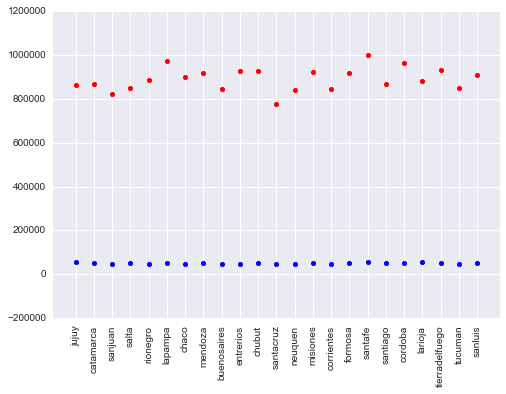

In [82]:
print cantPorProvincia
cantUnicasPorProvincia = {prov:len (words2[prov].keys()) for prov in argentina}
print cantUnicasPorProvincia
print sum(cantPorProvincia.values())
import seaborn

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,len(cantPorProvincia),1);
my_xticks = cantPorProvincia.keys()
plt.xticks(x, my_xticks, rotation='vertical')
plt.scatter(x, cantPorProvincia.values(),color='r')
plt.scatter(x, cantUnicasPorProvincia.values(),color='b')

plt.show()

### Me quedo con las palabras que fueron escritas por más de 5 personas distintas y ocurrieron más de 20 veces 

In [83]:
resultado = (result[(result.cantUsuariosTotal > 5 ) & (result.cantPalabra > 40) ]).copy()
#col = pd.Series(result.index)
#result['enDiccionario'] = map(lambda x: d.check(x),result.index)
resultado.shape

(6808, 71)

In [84]:
result.to_csv('todasNoPalabras.csv',encoding='utf-8')

In [85]:
import pandas as pd
df = pd.read_csv('todasNoPalabras.csv',encoding='utf-8')

In [86]:
df[df['Unnamed: 0']=='anga'][['cantPalabra','cantUsuariosTotal','fnorm_corrientes','fnorm_chaco','fnorm_misiones']]

,cantPalabra,cantUsuariosTotal,fnorm_corrientes,fnorm_chaco,fnorm_misiones
12523,106.0,59.0,73.145209,6.664023,13.004986


In [88]:
cantResultados = []
for i in range(0,50,1):
    resultado = (result[(result.cantUsuariosTotal > 5 ) & (result.cantPalabra > i) ]).copy()
    cantResultados.append(resultado.shape[0])
    #print i,resultado.shape[0]


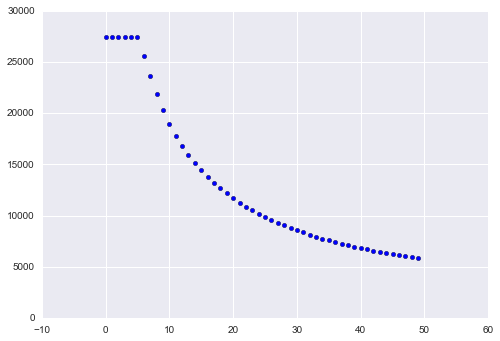

In [89]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 50, 1);
plt.scatter(x, cantResultados)
plt.show()

In [32]:

resultado.sort_values(['cantPalabra','cantUsuariosTotal'],ascending=[True,False]).head(100)


,buenosairesPalabras,catamarcaPalabras,chacoPalabras,chubutPalabras,cordobaPalabras,corrientesPalabras,entreriosPalabras,formosaPalabras,jujuyPalabras,lapampaPalabras,...,fnorm_misiones,fnorm_corrientes,fnorm_formosa,fnorm_santafe,fnorm_santiago,fnorm_cordoba,fnorm_larioja,fnorm_tierradelfuego,fnorm_tucuman,fnorm_sanluis
apurateee,3.0,10.0,6.0,7.0,2.0,8.0,5.0,5.0,1.0,2.0,...,0.000002,0.000009,0.000005,5.995360e-06,0.000001,0.000002,0.000000,0.000006,0.000001,0.000007
pelotudaaa,2.0,6.0,8.0,4.0,6.0,1.0,4.0,6.0,2.0,0.0,...,0.000003,0.000001,0.000007,7.993813e-06,0.000003,0.000006,0.000005,0.000005,0.000004,0.000009
merecia,2.0,8.0,4.0,7.0,4.0,3.0,5.0,5.0,6.0,2.0,...,0.000003,0.000004,0.000005,2.997680e-06,0.000001,0.000004,0.000005,0.000005,0.000004,0.000006
mantecol,7.0,6.0,6.0,7.0,1.0,3.0,6.0,3.0,1.0,6.0,...,0.000000,0.000004,0.000003,3.996906e-06,0.000002,0.000001,0.000001,0.000005,0.000005,0.000007
tiernooo,6.0,12.0,4.0,3.0,2.0,7.0,5.0,9.0,8.0,0.0,...,0.000003,0.000008,0.000010,2.997680e-06,0.000003,0.000002,0.000002,0.000005,0.000004,0.000006
mani,1.0,3.0,3.0,5.0,10.0,0.0,8.0,3.0,4.0,3.0,...,0.000002,0.000000,0.000003,4.996133e-06,0.000013,0.000010,0.000002,0.000008,0.000004,0.000009
perfeccion,4.0,5.0,4.0,3.0,3.0,6.0,0.0,6.0,11.0,1.0,...,0.000004,0.000007,0.000007,4.996133e-06,0.000009,0.000003,0.000003,0.000004,0.000002,0.000007
friday,1.0,1.0,3.0,2.0,6.0,11.0,0.0,4.0,7.0,2.0,...,0.000012,0.000013,0.000004,1.998453e-06,0.000002,0.000006,0.000005,0.000001,0.000004,0.000003
pagani,7.0,1.0,4.0,4.0,3.0,5.0,18.0,2.0,1.0,6.0,...,0.000002,0.000006,0.000002,2.098376e-05,0.000005,0.000003,0.000002,0.000003,0.000000,0.000002
changuito,4.0,19.0,32.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,...,0.000002,0.000000,0.000000,0.000000e+00,0.000023,0.000000,0.000006,0.000000,0.000005,0.000001


### Escribo el dataframe en palabras.csv 

In [90]:
resultado.sort_values(['cantPalabra','cantUsuariosTotal'],ascending=[False,False]).to_csv('palabras.csv',encoding='utf-8')

## Leo el dataframe

In [91]:
import pandas as pd
df = pd.read_csv('palabras.csv',encoding='utf-8')

In [92]:
df.head()
df = df.rename(columns={'Unnamed: 0':'Palabra'})

In [103]:
import re
i = 1
sacar = []
jaregex = r'j+a[aj]+$|a+j[aj]+$'
for palabra in df['Palabra']:
    if re.match(jaregex,palabra):
        #print palabra,i
        sacar.append(palabra)
        i += 1
print i

165


In [104]:
import re
i = 1
jiregex = r'j+i[ij]+$|i+j[ij]+$'
for palabra in df['Palabra']:
    if re.match(jiregex,palabra):
        #print palabra,i
        i += 1
print i

4


In [105]:
import re
i = 1
jeregex = r'j+e[ej]+$|e+j[ej]+$'
for palabra in df['Palabra']:
    if re.match(jeregex,palabra):
        print palabra,i
        i += 1
print i

jeje 1
jejeje 2
jejej 3
jejejeje 4
jeee 5
jejejej 6
jej 7
jejejejeje 8
jee 9
10


In [106]:

i = 1
joregex = r'j+o[oj]+$|o+j[oj]+$'
for palabra in df['Palabra']:
    if re.match(joregex,palabra):
        print palabra,i
        i += 1
print i

jojo 1
jojojo 2
jooo 3
ojooo 4
jjoo 5
6


In [107]:

i = 1
juregex = r'j+u[uj]+$|u+j[uj]+$'
for palabra in df['Palabra']:
    if re.match(juregex,palabra):
        print palabra,i
        i += 1
print i

juju 1
jujuju 2
jujuuu 3
jujujuju 4
5


In [108]:
i = 1
tripalabras = []
triregex = r'[a-z]+([a-z])\1{2}'
for palabra in df['Palabra']:
    if re.match(triregex,palabra):
        print palabra,i
        tripalabras.append(palabra)
        i += 1


siii 1
nooo 2
amooo 3
goool 4
naaa 5
yaaa 6
ahhh 7
dormirrr 8
masss 9
diosss 10
ayyy 11
quierooo 12
queee 13
nocheee 14
daleee 15
diaaa 16
amorrr 17
madreee 18
seee 19
jaaa 20
vosss 21
lindooo 22
locooo 23
holaaa 24
mierdaaa 25
favorrr 26
vidaaa 27
muuuy 28
graciasss 29
amigaaa 30
cheee 31
ehhh 32
taaan 33
nadaaa 34
todooo 35
gooolll 36
maaas 37
shhh 38
asiii 39
bueee 40
diooos 41
uhhh 42
mmmm 43
maaal 44
vamosss 45
ohhh 46
lindaaa 47
vamooos 48
mejorrr 49
miii 50
hambreee 51
yooo 52
felizzz 53
buenaaa 54
bocaaa 55
viernesss 56
odiooo 57
putaaa 58
friooo 59
weee 60
muchooo 61
biennn 62
vamooo 63
amooor 64
bieeen 65
viejaaa 66
buenooo 67
esooo 68
keee 69
tengooo 70
casaaa 71
irrr 72
emboleee 73
cumpleee 74
cabezaaa 75
pfff 76
broncaaa 77
aaaa 78
finnn 79
hermosaaa 80
carajooo 81
bueeeno 82
reee 83
siestaaa 84
laaa 85
tantooo 86
paaa 87
papaaa 88
fueee 89
awww 90
faaa 91
ufff 92
taaanto 93
graciaaas 94
calorrr 95
verrr 96
wiii 97
hermosooo 98
esss 99
aburrooo 100
andaaa 101
vooos 102
hoy

In [109]:
import enchant
i = 1
noPalabras = []
d = enchant.Dict("es_AR")
for pal in sorted(tripalabras):
    replaced = re.sub(r'([a-z])\1{2}', r'\1', pal)
    print pal
    if d.check(replaced):
        sacar.append(pal)
        print i, pal,replaced
        i += 1
    else:
        noPalabras.append(pal)
print i, len(tripalabras)

aaaa
aaaah
aaaay
aaahhh
1 aaahhh ah
aaayyy
2 aaayyy ay
aahhh
abuelaaa
3 abuelaaa abuela
aburridaaa
4 aburridaaa aburrida
aburridooo
5 aburridooo aburrido
aburrimientooo
6 aburrimientooo aburrimiento
aburrooo
7 aburrooo aburro
aburrro
8 aburrro aburo
acaaa
adentrooo
9 adentrooo adentro
adorooo
10 adorooo adoro
afterrr
afueraaa
11 afueraaa afuera
aguaaa
12 aguaaa agua
aguantaaa
13 aguantaaa aguanta
aguanteee
14 aguanteee aguante
aguantiaaa
agusss
ahhh
15 ahhh ah
ahiii
ahoraaa
16 ahoraaa ahora
aiii
aireee
17 aireee aire
aiudaaa
alegriaaa
algooo
18 algooo algo
almaaa
19 almaaa alma
amaaa
20 amaaa ama
amigaaa
21 amigaaa amiga
amigaaas
22 amigaaas amigas
amigasss
23 amigasss amigas
amigooo
24 amigooo amigo
amigosss
25 amigosss amigos
amiguiii
amiguitaaa
amiii
26 amiii ami
ammm
ammmo
27 ammmo amo
amooo
28 amooo amo
amooor
29 amooor amor
amooorrr
30 amooorrr amor
amorrr
31 amorrr amor
andaaa
32 andaaa anda
anocheee
33 anocheee anoche
antesss
34 antesss antes
apaaa
35 apaaa apa
aprobeee
apuraaa

In [110]:
print len(sacar)

781


In [54]:
d.check('aaa')
'aaa' in sacar

False

In [111]:
dfLimpia = df[-df.Palabra.isin(sacar)]
print df.shape[0],dfLimpia.shape[0]


5837 5057


In [112]:
dfLimpia.sort_values(['cantPalabra','cantUsuariosTotal'],ascending=[False,False]).to_csv('palabrasClean.csv',encoding='utf-8')

In [113]:
dfLimpia.sort_values(['cantPalabra','cantUsuariosTotal'],ascending=[False,False]).to_excel('palabrasClean0.xls')

In [114]:
import pandas as pd
df = pd.read_csv('palabrasClean.csv',encoding='utf-8')
df1 = pd.read_excel('palabrasClean0.xls')

In [115]:
print df.shape,df1.shape

(5057, 73) (5057, 72)


Index([u'Palabra', u'buenosairesPalabras', u'catamarcaPalabras',
       u'chacoPalabras', u'chubutPalabras', u'cordobaPalabras',
       u'corrientesPalabras', u'entreriosPalabras', u'formosaPalabras',
       u'jujuyPalabras', u'lapampaPalabras', u'lariojaPalabras',
       u'mendozaPalabras', u'misionesPalabras', u'neuquenPalabras',
       u'rionegroPalabras', u'saltaPalabras', u'sanjuanPalabras',
       u'sanluisPalabras', u'santacruzPalabras', u'santafePalabras',
       u'santiagoPalabras', u'tierradelfuegoPalabras', u'tucumanPalabras',
       u'cantPalabra', u'buenosairesPalabrasPersonas',
       u'catamarcaPalabrasPersonas', u'chacoPalabrasPersonas',
       u'chubutPalabrasPersonas', u'cordobaPalabrasPersonas',
       u'corrientesPalabrasPersonas', u'entreriosPalabrasPersonas',
       u'formosaPalabrasPersonas', u'jujuyPalabrasPersonas',
       u'lapampaPalabrasPersonas', u'lariojaPalabrasPersonas',
       u'mendozaPalabrasPersonas', u'misionesPalabrasPersonas',
       u'neuquenPala

In [116]:
df1[df1['Palabra']=='anga'][['cantPalabra','fnorm_misiones','fnorm_corrientes','fnorm_chaco']]

,cantPalabra,fnorm_misiones,fnorm_corrientes,fnorm_chaco
2975,106,13.004986,73.145209,6.664023


In [117]:
df1 = df1.set_index('Palabra')
print df1.index
#print idmax.head(20)

Index([u'q', u'dia', u'asi', u'pessoas', u'seu', u'i', u'the', u'you', u'and',
       u'finde',
       ...
       u'cb', u'línda', u'jah', u'rigoni', u'ferchu', u'motoencuentro',
       u'carabajal', u'geor', u'regram', u'stardoll'],
      dtype='object', name=u'Palabra', length=5057)


In [118]:

# df2 = df1.replace(to_replace=0,value=min())
idmax = df1.filter(regex=("fnorm.*")).idxmax(1)
maxi = df1.filter(regex=("fnorm.*")).max(1)
df1['provFnormMax'] = idmax
df1['FnormMax'] = maxi
idmin = df1.filter(regex=("fnorm.*"))[df1>0.0000000000000001].idxmin(1)
mini = df1.filter(regex=("fnorm.*"))[df1>0.0000000000000001].min(1)
df1['provFnormMin'] = idmin
df1['FnormMin'] = mini
#print df1.columns
minFnorm = df1['FnormMin'].min()
print minFnorm
df1['maxDif'] = df1.FnormMax / df1.FnormMin
print df1[['provFnormMax','provFnormMin','FnormMax','FnormMin','maxDif']].head(20)


0.999226598613
                provFnormMax      provFnormMin     FnormMax     FnormMin  \
Palabra                                                                    
q            fnorm_entrerios    fnorm_santiago  6131.505246  1512.101407   
dia          fnorm_catamarca       fnorm_chaco  1609.328344   865.212355   
asi          fnorm_catamarca     fnorm_lapampa  1352.434844   761.955940   
pessoas       fnorm_santiago       fnorm_jujuy  1890.126759    43.988966   
seu           fnorm_santiago     fnorm_larioja  1645.386942    36.245098   
i              fnorm_larioja      fnorm_chubut  1811.122262   327.430224   
the              fnorm_salta    fnorm_misiones  1014.357697   179.902311   
you            fnorm_larioja    fnorm_misiones  1792.999712   183.153557   
and              fnorm_salta      fnorm_chubut  1015.535813   209.641793   
finde        fnorm_entrerios       fnorm_jujuy   746.406708   300.977134   
river            fnorm_jujuy     fnorm_cordoba   849.681601   151.478838 

In [119]:
df2 = df1.sort_values(['maxDif','cantPalabra','cantUsuariosTotal'],ascending=[False,False,False])[['cantPalabra','cantUsuariosTotal','provFnormMax','provFnormMin','FnormMax','FnormMin','maxDif']]

In [50]:
df2.head(30)

,cantPalabra,cantUsuariosTotal,provFnormMax,provFnormMin,FnormMax,FnormMin,maxDif
Palabra,,,,,,,
jujuy,2329,288,fnorm_jujuy,fnorm_rionegro,0.002409,1.127008e-06,2137.495274
stats,6138,159,fnorm_sanjuan,fnorm_lapampa,0.001208,1.025513e-06,1177.974707
luke,1086,45,fnorm_larioja,fnorm_cordoba,0.001168,1.037526e-06,1125.534628
cafayate,930,46,fnorm_salta,fnorm_larioja,0.001065,1.132659e-06,940.279793
alvear,995,150,fnorm_mendoza,fnorm_misiones,0.001011,1.083749e-06,932.772186
catamarca,1062,207,fnorm_catamarca,fnorm_misiones,0.000993,1.083749e-06,916.277171
would,1487,120,fnorm_larioja,fnorm_misiones,0.000922,1.083749e-06,850.736480
inglaterra,1023,124,fnorm_larioja,fnorm_neuquen,0.000989,1.188055e-06,832.294582
casilda,770,100,fnorm_santafe,fnorm_lapampa,0.000767,1.025513e-06,748.314501


In [120]:
print noPalabras

[u'aaaa', u'aaaah', u'aaaay', u'aahhh', u'acaaa', u'afterrr', u'aguantiaaa', u'agusss', u'ahiii', u'aiii', u'aiudaaa', u'alegriaaa', u'amiguiii', u'amiguitaaa', u'ammm', u'aprobeee', u'aquiii', u'asaditooo', u'asiii', u'awantaaa', u'awantiaaa', u'awww', u'babyyy', u'bajonnn', u'bajooon', u'barilocheee', u'barilooo', u'birraaa', u'boeee', u'boluuu', u'bombonnn', u'booo', u'boquitaaa', u'brooo', u'buaaa', u'bueee', u'buenisimooo', u'cagooon', u'camiii', u'campeooon', u'celuuu', u'chaaau', u'chabonnn', u'chabooon', u'chauuu', u'chuuu', u'claaa', u'corazonnn', u'corazooon', u'creeer', u'culiaaa', u'culiadooo', u'culiaooo', u'decisss', u'diaaa', u'diaaas', u'diasss', u'diiia', u'diuuu', u'dormiii', u'dorrr', u'eeee', u'eeeeh', u'eiii', u'emmm', u'euuu', u'exitosss', u'facuuu', u'fernettt', u'fiacaaa', u'findeee', u'fuaaa', u'geniaaa', u'golazooo', u'goooll', u'gordiii', u'graxxx', u'grosaaa', u'grrr', u'gymmm', u'hdppp', u'holiii', u'holuuu', u'hooo', u'huuu', u'iaaa', u'idolaaa', u'idolooo

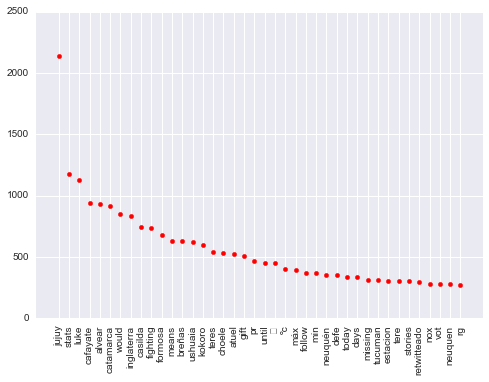

In [121]:
import seaborn
df2 = df1.sort_values(['maxDif','cantPalabra','cantUsuariosTotal'],ascending=[False,False,False])[['cantPalabra','cantUsuariosTotal','provFnormMax','provFnormMin','FnormMax','FnormMin','maxDif']].head(40)

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,len(df2.index),1);
my_xticks = df2.index
plt.xticks(x, my_xticks, rotation='vertical')
plt.scatter(x, df2.maxDif,color='r')


plt.show()

In [122]:
df1.to_excel('palabrasCleanMaxDif.xls')